# Handwritten digits recognition with manual feature extraction

The new banc "First bank of Wiki" wishes to implement an automatic recognising system of checks like the next one:

![check image](https://upload.wikimedia.org/wikipedia/commons/b/b9/CanadianChequeSample.png)

Nowadays, the bank has a system capable of isolating the digits and convert them into 8 x 8 pixels images. But it can't recognise what digit it is. For that reason, they have requested us to create a module capable of recognising them.


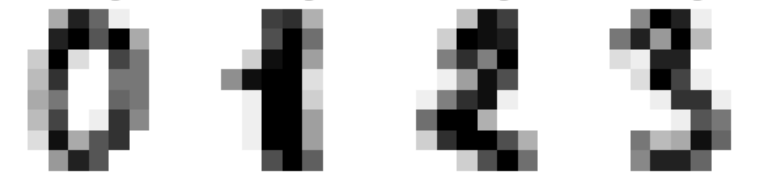



# Loading the dataset

First we will load the dataset and visualize the digits.

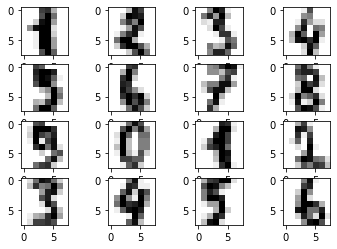

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()

for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(digits.images[i,:,:], cmap=plt.get_cmap('gray_r'))

# Binarise the dataset

To start with a simpler program, we will just work with the scenary of binary classification for the digits 0 and 1. For this, we will first filter the data and then partition it in training and test folds.

In [5]:
# Loading the digits
#X, y = load_digits(return_X_y=True)
X, y = digits.images, digits.target

# Filtring those that are 0 or 1
indices = np.array(range(X.shape[0]))
bin_indices = indices[(y==0) | (y == 1)]

X_bin = X[bin_indices,:,:]
y_bin = y[bin_indices]

# Creating the splits for training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X_bin, y_bin, test_size=0.33, random_state=42)

print(y_bin_train)

print("Total of data to classify 10 digits: " + str(y.shape[0]))
print("Total of data for binary classification: " + str(y_bin.shape[0]))
print("Total of 1s for binary classification: " + str(y_bin_test.sum()))
print("Total of 0s for binary classification: " + str(y_bin_test.shape[0] - y_bin_test.sum()))


[1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1
 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1
 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1
 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1
 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0
 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1]
Total of data to classify 10 digits: 1797
Total of data for binary classification: 360
Total of 1s for binary classification: 60
Total of 0s for binary classification: 59


Visualising the digits for the binary problem

[[ 0.  0.  0.  0. 14. 13.  1.  0.]
 [ 0.  0.  0.  5. 16. 16.  2.  0.]
 [ 0.  0.  0. 14. 16. 12.  0.  0.]
 [ 0.  1. 10. 16. 16. 12.  0.  0.]
 [ 0.  3. 12. 14. 16.  9.  0.  0.]
 [ 0.  0.  0.  5. 16. 15.  0.  0.]
 [ 0.  0.  0.  4. 16. 14.  0.  0.]
 [ 0.  0.  0.  1. 13. 16.  1.  0.]]
[[16. 16.]
 [14. 16.]]
1


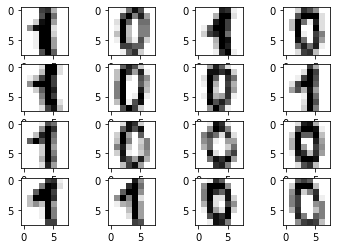

In [6]:
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(X_bin[i,:,:], cmap=plt.get_cmap('gray_r'))

# This is to see if the idea of considering the mean works
print(X_bin[3])
print(X_bin[3][3:5,3:5])
print(y_bin[3])

# Training a simple perceptron with manual feature extraction for binary classification

Now we will proceed to train a perceptron using the Scikit Learn library. This library implements many ready-to-use models. In this case we shall use the simple perceptron `sklearn.linear_model.Perceptron`.

Before defining the perceptron, we will define the feature extraction method that will transform an image (`np.array`) of 8 x 8 in a two component vector. For this we will prove with three different strategies.

* **Strategy 1:** We will consider the feature 0 as the mean of intensities in the superior part of the digits (rows 0 to 3) and the feature 1 as the maen in the inferior part (rows 4 to 7) as the image indicates:

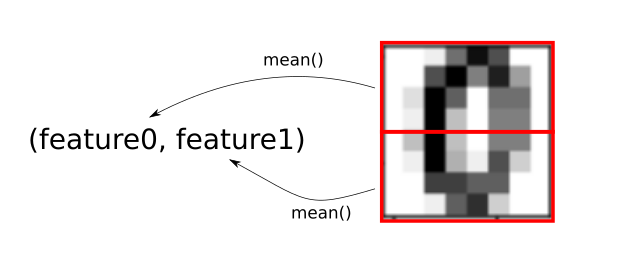

* **Strategy 2:** As an alternative, we will consider the feature 0 as the mean in the whole image and the feature 1 as the standard deviation:

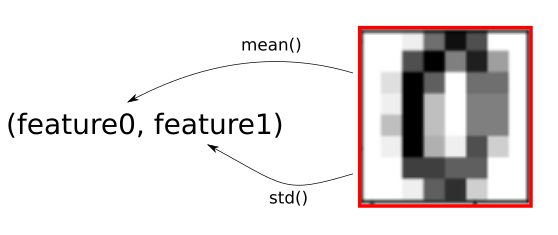

* **Strategy 3:** For the third strategy we will only consider one feature, consisting of the mean of the central pixels. 

In [7]:
def extract_features_mean_std(x):
  x_out = np.zeros(shape=(1,2))
  x_out[0,0] = np.mean(x[0,3]) 
  x_out[0,1] = np.std(x[3,7])

  return x_out

def extract_features_mean_top_bottom(x):
  x_out = np.zeros(shape=(1,2))
  x_out = np.mean(x[0,3])
  x_out = np.mean(x[4,7])

  return x_out

def extract_features_mean_mid(x):
  x_out = np.zeros(shape=(1,2))
  x_out = np.mean(x[3:5,3:5])

  return x_out

def preprocess_features_mean_std(X):
  X_pp = np.zeros(shape=(X.shape[0], 2))

  for i in range(X.shape[0]):
    X_pp[i,:] = extract_features_mean_std(X[i,:,:])

  return X_pp
  
def preprocess_features_mean_top_bottom(X):
  X_pp = np.zeros(shape=(X.shape[0], 2))

  for i in range(X.shape[0]):
    X_pp[i,:] = extract_features_mean_top_bottom(X[i,:,:])

  return X_pp


def preprocess_features_mean_mid(X):
  X_pp = np.zeros(shape=(X.shape[0], 2))

  for i in range(X.shape[0]):
    X_pp[i,:] = extract_features_mean_mid(X[i,:,:])

  return X_pp

Now we will implement the perceptron using the class `sklearn.linear_model.Perceptron` and we will train it using the chosen features and comparing their accuracy.

In [8]:

# Define a pereceptrón
clf = Perceptron(tol=1e-2, random_state=0)

# Transform the features for the data of the binary problem
X_bin_train_features = preprocess_features_mean_mid(X_bin_train)
X_bin_test_features = preprocess_features_mean_mid(X_bin_test)

# train the classifier
clf.fit(X_bin_train_features, y_bin_train)

# Print the accuracy in the test data.
print("Accuracy in test: " + str(clf.score(X_bin_test_features, y_bin_test)))

# Print the predictions for the test data

print("Predictions: " + str(clf.predict(X_bin_test_features)))


Accuracy in test: 0.9495798319327731
Predictions: [1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1
 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0
 1 1 1 1 0 1 1 0]


# Visualising the features

To understand the degree of discrimination that the features present, we will visualise the. To do so, color the items in each class with a different colour.

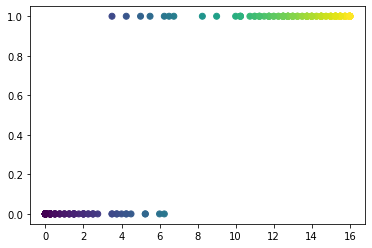

In [9]:
plt.figure()
plt.scatter(X_bin_train_features[:,0],y_bin_train, c=X_bin_train_features[:,0])

# Complicating everything: 

Now we go back to the 10 digits case and test the same strategy we were using in the previous case.

In [10]:
# Define the perceptron
clf10 = Perceptron(tol=1e-2, random_state=0)

X_train_features = preprocess_features_mean_mid(X_train)
X_test_features = preprocess_features_mean_mid(X_test)

clf10.fit(X_train_features, y_train)

# Print the accuracy in the test data.
print("Accuracy in test: " + str(clf10.score(X_test_features, y_test)))

# Print the predictions for the test data.

print("Predictions: " + str(clf10.predict(X_test_features)))


Accuracy in test: 0.1717171717171717
Predictions: [3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 0 3 0 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 0 3 3 3 3 3 0 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 0 3 3 3 3 3 3 3
 0 3 3 3 3 0 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3
 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 0 3 3 3 0 3 3 3 3 3 3 3 3 0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3
 3 3 3 0 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 0 3 3 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 0 0 3 0 3 3 0 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3
 3 3 3 3 3 3 3 3 0 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3

To ty and understand why the performance is so bad now, visualise the fetures for the 10 classes, coloring each point with a different colour as we did previously.

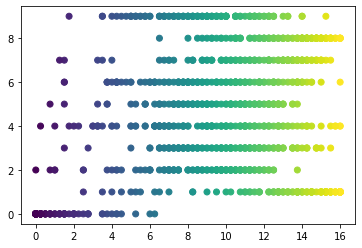

In [11]:
plt.figure()
plt.scatter(X_train_features[:,0],y_train, c=X_train_features[:,0])

# Questions:

1. Which was the strategy of feature extraction that worked best?

2. Which would be the accuracy for an algorithm that predicts randomly the classes in the case of a binary problem? And in the case of the 10 digits multiclass problem?

3. The designed classifier for each case (binary and multiclass), worked better than a random classifier?
